In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## ANOVA: Analysis of Variance

### iPhone Sales

In [3]:
a = [25, 25, 27, 30, 23, 20]
b = [30, 30, 21, 24, 26, 28]
c = [18, 30, 29, 29, 24, 26]
list_of_tuples = list(zip(a, b,c))
df = pd.DataFrame(list_of_tuples, columns = ['A', 'B', 'C'])
df

,A,B,C
0,25,30,18
1,25,30,30
2,27,21,29
3,30,24,29
4,23,26,24
5,20,28,26


In [4]:
m1 = np.mean(a)
m2 = np.mean(b)
m3 = np.mean(c)

print('Average sales for A: {}'.format(m1))
print('Average sales for B: {}'.format(m2))
print('Average sales for C: {}'.format(m3))

Average sales for A: 25.0
Average sales for B: 26.5
Average sales for C: 26.0


In [5]:
m = (m1+m2+m3)/3 
print('Overall mean: {}'.format(m))

Overall mean: 25.833333333333332


In [6]:
SSb = 6*((m1-m)**2+(m2-m)**2+(m3-m)**2)
print(f'Between-groups Sum of Squared Differences: {SSb}')

Between-groups Sum of Squared Differences: 6.999999999999999


In [7]:
MSb = SSb/2
print('Between-groups Mean Square value: {}'.format(MSb))

Between-groups Mean Square value: 3.4999999999999996


In [8]:
err_a = list(a-m1)
err_b = list(b-m2)
err_c = list(c-m3)
err = err_a+err_b+err_c
ssw = []
for i in err:
    ssw.append(i**2)
    
SSw = np.sum(ssw)
print(SSw)

223.5


In [9]:
MSw = SSw/15
print(f'Within-group Mean Square Value: {MSw}')

Within-group Mean Square Value: 14.9


In [10]:
F = MSb / MSw
print(f'F-score: {F}')

F-score: 0.23489932885906037


In [11]:
d1 = 2
d2 = 15

from scipy.stats import f
p_value = 1 - f.cdf(F, d1, d2)
print(f'p-value: {p_value}')

p-value: 0.7935046627328333


In [12]:
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(a, b, c)
print("F-stat: ", f_stat)
print("p-value: ", p_value)

F-stat:  0.2348993288590604
p-value:  0.793504662732833


In [32]:
#Q5
m1 = [8,9,11,12]
m2 = [6,8,10,4]
m3 = [14,12,18,9]
m4 = [20,22,25,23]
print(np.mean(m1),np.mean(m2),np.mean(m3),np.mean(m4))
all_val = zip(m1,m2,m3,m4)
df = pd.DataFrame(all_val,columns=['m1','m2','m3','m4'])
df
f_test,p_value = f_oneway(m1,m2,m3,m4)
print(f'f_test :{round(f_test,2)} , p_value : {(p_value)}')

10.0 7.0 13.25 22.5
f_test :25.22 , p_value : 1.8124793267561276e-05


In [37]:
s = [300,400,300,500,0]
n = [600,300,300,400]
r = [700,300,400,600,500]
print(np.mean(s),np.mean(n),np.mean(r))
f_test,p_value = f_oneway(m1,m2,m3,m4)
print(f'f_test :{round(f_test,2)} , p_value : {(p_value)}')
f.ppf(0.05,2,12)

300.0 400.0 500.0
f_test :25.22 , p_value : 1.8124793267561276e-05


0.051513170677201556

### Aerofit data

Let us apply ANOVA to study the relationships between the following variables:
  1. Income vs. Product
  2. Income vs. Gender

In [14]:
df_aerofit = pd.read_csv("aerofit.csv")

In [15]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


#### Income vs. Product

<AxesSubplot: xlabel='Product', ylabel='Income'>

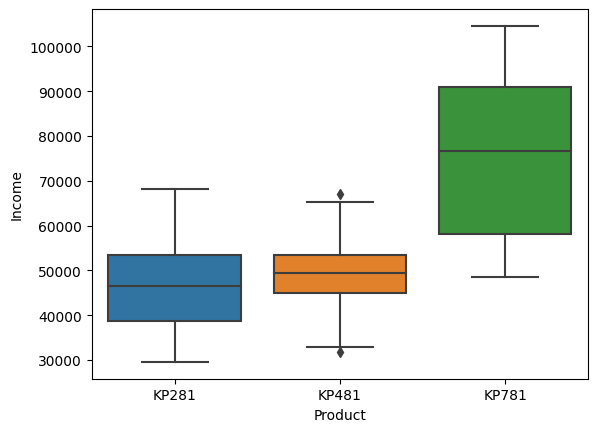

In [16]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

In [17]:
a = df_aerofit[df_aerofit["Product"]=="KP281"]["Income"]
b = df_aerofit[df_aerofit["Product"]=="KP481"]["Income"]
c = df_aerofit[df_aerofit["Product"]=="KP781"]["Income"]

In [18]:
# H0: all three have same mean
f_oneway(a, b, c)

F_onewayResult(statistic=89.25903546601671, pvalue=1.564499131634248e-27)

In [19]:
f_oneway(a, b)

F_onewayResult(statistic=2.8283463437143213, pvalue=0.09487529747265082)

<AxesSubplot: xlabel='Income', ylabel='Count'>

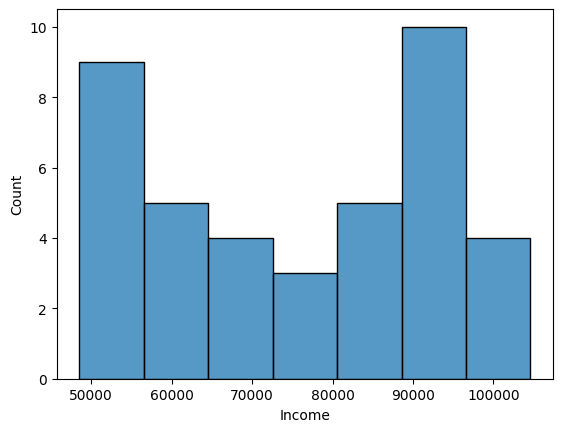

In [20]:
sns.histplot(c)

In [21]:
from scipy.stats import kruskal

In [22]:
kruskal(a, b, c)

KruskalResult(statistic=61.43670384567185, pvalue=4.562357014275808e-14)

### Doubt Session

__Is education gender independent?__

A random sample of 395 people was surveyed and each person was asked to report the highest education level they obtained.

The data observed are summarized below:

Female(60, 54, 46, 41, 201), Male(40, 44, 53, 57, 194) and Total(100, 98, 99, 98, 395),

where variables in each class are (High school, Bachelors, Masters, Ph.d, Total).

The expected values are: Female(50.866, 49.868, 50.377, 49.868, 201), Male(49.114, 48.132, 48.623, 48.132, 194) and Total(100, 98, 99, 98, 395).

Are gender and education levels dependent at a 5% significance level?

In [23]:
from scipy.stats import chi2_contingency

ct = [
    [60, 40],
    [54, 44],
    [46, 53],
    [41, 57]
]

chi2_contingency(ct)

(8.006066246262538,
 0.04588650089174722,
 3,
 array([[50.88607595, 49.11392405],
        [49.86835443, 48.13164557],
        [50.37721519, 48.62278481],
        [49.86835443, 48.13164557]]))